# Waffle Charts, Word Clouds, and Regression Plots

Estimated time needed: **40** minutes

## Objectives

After completing this lab you will be able to:

*   Create Word cloud and Waffle charts
*   Create regression plots with Seaborn library


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Import Libraries](#0)<br>
2.  [Fetching Data](#1)<br>
3.  [Waffle Charts](#3) <br>
4.  [Word Clouds](#4) <br>
5.  [Ploting with Seaborn](#5) <br>
6.  [Regression Plots](#6) <br>

</div>


# Import Libraries

In [1]:
# Import and setup matplotlib:

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # Needed for Waffle Charts

#Import Primary modules:
import numpy as np # For many scientific computing in python
import pandas as pd # Primary data structure library
from PIL import Image # Converting images into arrays

# Import seaborn
import seaborn as sns

#import wordcloud
import wordcloud


# Fetching Data<a id="1"></a>

Toolkits: The course heavily relies on [*pandas*](http://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) and [*Numpy*](http://www.numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) for data wrangling, analysis, and visualization. The primary plotting library we will explore in the course is [Matplotlib](http://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).

Dataset: Immigration to Canada from 1980 to 2013 - [International migration flows to and from selected countries - The 2015 revision](https://www.un.org/development/desa/pd/data/international-migration-flows) from United Nation's website

The dataset contains annual data on the flows of international migrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. <br><br>In this lab, we will focus on the Canadian Immigration data and use the *already cleaned dataset*.<br><br>
You can refer to the lab on data pre-processing wherein this dataset is cleaned for a quick refresh your Panads skill [Data pre-processing with Pandas](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/v4/DV0101EN-Exercise-Dataset-Preprocessing-Exploring-with-Pandas.ipynb)



In [2]:
df= pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [3]:
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [4]:
df.shape

(195, 39)

**Set the Country as index**

In [5]:
df.set_index('Country', inplace = True)

In [6]:
print("entries in dataset: ",df.shape)

entries in dataset:  (195, 38)


# Waffle Charts <a id="3"></a>

A `waffle chart` is an interesting visualization that is normally created to display progress toward goals. It is commonly an effective option when you are trying to add interesting visualization features to a visual that consists mainly of cells, such as an Excel dashboard.


Let's revisit the previous case study about Denmark, Norway, and Sweden.


In [7]:
# Lets create a new df for these three countries
df_dns = df.loc[['Denmark','Norway','Sweden'],:]

#lets take a look at or dataframe
df_dns

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


**Unfortunately, unlike R, `waffle` charts are not built into any of the Python visualization libraries. Therefore, we will learn how to create them from scratch.**


**Step 1.** The first step into creating a waffle chart is determing the proportion of each category with respect to the total.


In [8]:
# Compute the proportion of each category with respect to the total
total_val = df_dns['Total'].sum()
category_proportion = df_dns['Total']/total_val

#print out proportions
pd.DataFrame({'Category Porportion': category_proportion})

,Category Porportion
Country,
Denmark,0.322557
Norway,0.192409
Sweden,0.485034


**Step 2.** The second step is defining the overall size of the `waffle` chart.


In [9]:
width = 40 #width of chart
height = 10 # height of chart

total_num_tiles = width + height # total number of tiles

print(f'Total number of tiles is {total_num_tiles}.')

Total number of tiles is 50.


**Step 3.** The third step is using the proportion of each category to determe it respective number of tiles


In [10]:
# compute the number of tiles for each category
tiles_per_category = (category_proportion * total_num_tiles).round().astype(int)

# print out number of tiles per category
pd.DataFrame({"Number of tiles": tiles_per_category})

,Number of tiles
Country,
Denmark,16
Norway,10
Sweden,24


Based on the calculated proportions, Denmark will occupy 129 tiles of the `waffle` chart, Norway will occupy 77 tiles, and Sweden will occupy 194 tiles.


**Step 4.** The fourth step is creating a matrix that resembles the `waffle` chart and populating it.


In [11]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width), dtype = np.uint)

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


Let's take a peek at how the matrix looks like.


In [12]:
waffle_chart

array([[  1,   1,   2,   3,   3,   4,  14,  24,  34,  44,  54,  64,  74,
         84,  94, 104, 114, 124, 134, 144, 154, 164, 174, 184, 194, 204,
        214, 224, 234, 244, 254, 264, 274, 284, 294, 304, 314, 324, 334,
        344],
       [  1,   1,   2,   3,   3,   5,  15,  25,  35,  45,  55,  65,  75,
         85,  95, 105, 115, 125, 135, 145, 155, 165, 175, 185, 195, 205,
        215, 225, 235, 245, 255, 265, 275, 285, 295, 305, 315, 325, 335,
        345],
       [  1,   1,   2,   3,   3,   6,  16,  26,  36,  46,  56,  66,  76,
         86,  96, 106, 116, 126, 136, 146, 156, 166, 176, 186, 196, 206,
        216, 226, 236, 246, 256, 266, 276, 286, 296, 306, 316, 326, 336,
        346],
       [  1,   1,   2,   3,   3,   7,  17,  27,  37,  47,  57,  67,  77,
         87,  97, 107, 117, 127, 137, 147, 157, 167, 177, 187, 197, 207,
        217, 227, 237, 247, 257, 267, 277, 287, 297, 307, 317, 327, 337,
        347],
       [  1,   1,   2,   3,   3,   8,  18,  28,  38,  48,  58,  68, 

**Step 5.** Map the `waffle` chart matrix into a visual.


<Figure size 640x480 with 0 Axes>

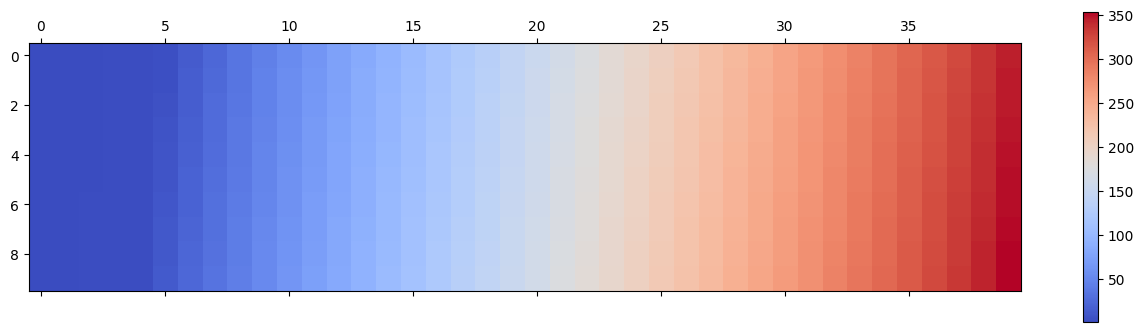

In [13]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()

<Figure size 640x480 with 0 Axes>

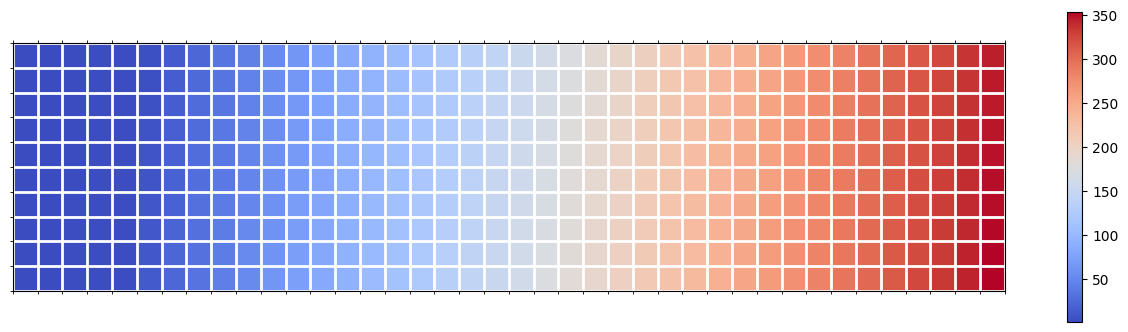

In [14]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])
plt.show()

**Step 7.** Create a legend and add it to chart.


C:\Users\jayant panwar\AppData\Local\Temp\ipykernel_10464\724894238.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_values = values_cumsum[len(values_cumsum) - 1]
C:\Users\jayant panwar\AppData\Local\Temp\ipykernel_10464\724894238.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_str = category + ' (' + str(df_dns['Total'][i]) + ')'
C:\Users\jayant panwar\AppData\Local\Temp\ipykernel_10464\724894238.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a v

<Figure size 640x480 with 0 Axes>

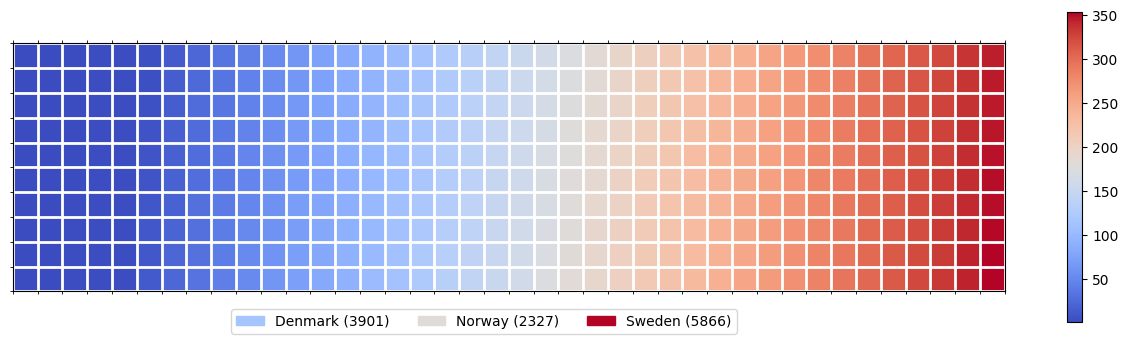

In [15]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dns['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dns.index.values):
    label_str = category + ' (' + str(df_dns['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dns.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )
plt.show()